# Project 1
## The Net Wars: Attack of the Bots
### Advanced Machine Learning - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
# Just to make plots look better
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

|Class  |Label |
| ----- | ---- | 
|Normal	|0     |
|Dos	|1     |
|R2L	|2     |
|U2R	|3     |
|Probe	|4     |

In [24]:
PATH_TO_DATA = 'dataset/'

test_students = pd.read_csv(PATH_TO_DATA + 'test_students.csv')
SampleID = test_students['SampleID']

train_students = pd.read_csv(PATH_TO_DATA + 'train_students.csv')


In [25]:
test_students = test_students.drop('SampleID', axis=1)

### Check Nulls and DataType

In [26]:
print(test_students.info())
print(train_students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44556 entries, 0 to 44555
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     44556 non-null  int64  
 1   protocol_type                44556 non-null  object 
 2   service                      44556 non-null  object 
 3   flag                         44556 non-null  object 
 4   src_bytes                    44556 non-null  int64  
 5   dst_bytes                    44556 non-null  int64  
 6   land                         44556 non-null  int64  
 7   wrong_fragment               44556 non-null  int64  
 8   urgent                       44556 non-null  int64  
 9   hot                          44556 non-null  int64  
 10  num_failed_logins            44556 non-null  int64  
 11  logged_in                    44556 non-null  int64  
 12  num_compromised              44556 non-null  int64  
 13  root_shell      

In [27]:
train_students.replace('normal', 0, inplace=True)
train_students.replace('Dos', 1, inplace=True)
train_students.replace('R2L', 2, inplace=True)
train_students.replace('U2R', 3, inplace=True)
train_students.replace('Probe', 4, inplace=True)

In [28]:
train_students['attack_type'].value_counts(normalize = True)

0    0.518964
1    0.358846
4    0.095545
2    0.025808
3    0.000837
Name: attack_type, dtype: float64

In [29]:
target = train_students['attack_type']
train_students = train_students.drop(columns=['attack_type'], axis=1)

### Categorical

In [30]:
from sklearn.preprocessing import StandardScaler

train_students = train_students.drop('service', axis=1)
test_students = test_students.drop('service', axis=1)

for col in train_students.columns:
    if train_students[col].dtype != 'object':
        train = np.array(train_students[col]).reshape(-1, 1)
        scaler = StandardScaler()
        train_students[col] = scaler.fit_transform(train)

for col in test_students.columns:
    if test_students[col].dtype != 'object':
        test = np.array(test_students[col]).reshape(-1, 1)
        scaler = StandardScaler()
        test_students[col] = scaler.fit_transform(test)

'''
encoder_1 = LabelEncoder()
# Fit the encoder on the data
encoder_1.fit(train_students["protocol_type"])

# Transform and replace training data
training_sex_encoded = encoder_1.transform(train_students["protocol_type"])
train_students["protocol_type"] = training_sex_encoded
test_sex_encoded = encoder_1.transform(test_students["protocol_type"])
test_students["protocol_type"] = test_sex_encoded

encoder_2 = LabelEncoder()
encoder_2.fit(train_students["flag"])

training_embarked_encoded = encoder_2.transform(train_students["flag"])
train_students["flag"] = training_embarked_encoded
testing_embarked_encoded = encoder_2.transform(test_students["flag"])
test_students["flag"] = testing_embarked_encoded
'''

train_students = pd.get_dummies(train_students, columns=['protocol_type'], drop_first=True)
#train_students = train_students.drop('service', axis=1)
#train_students = pd.get_dummies(train_students, columns=['service'], drop_first=True)
train_students= pd.get_dummies(train_students, columns=['flag'], drop_first=True)

test_students = pd.get_dummies(test_students, columns=['protocol_type'], drop_first=True)
#test_students = test_students.drop('service', axis=1)
#test_students = pd.get_dummies(test_students, columns=['service'], drop_first=True)
test_students= pd.get_dummies(test_students, columns=['flag'], drop_first=True)


### Target

In [31]:
y = target
X = train_students

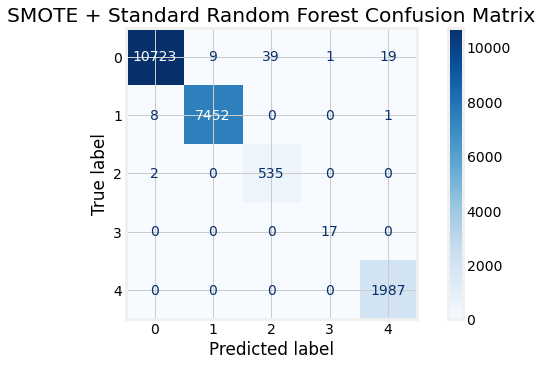

In [32]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.2, stratify=over_y, random_state=42)

SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

SMOTE_SRF.fit(over_X_train, over_y_train)

y_pred = SMOTE_SRF.predict(X_test)

fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, cmap='Blues')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

### Todos os modelos

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print('=========================================')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     10791
           1       1.00      1.00      1.00      7461
           2       0.93      1.00      0.96       537
           3       0.94      1.00      0.97        17
           4       0.99      1.00      0.99      1987

    accuracy                           1.00     20793
   macro avg       0.97      1.00      0.98     20793
weighted avg       1.00      1.00      1.00     20793



### O melhor

In [34]:
SMOTE_SRF.fit(over_X_train, over_y_train)

y_pred = SMOTE_SRF.predict(test_students)

In [35]:
submission = pd.DataFrame({'SampleID': SampleID, 'Class': y_pred})
print(submission)
submission.to_csv('submission_best_standard_dummies.csv', index=False)

       SampleID  Class
0             0      0
1             1      0
2             2      0
3             3      0
4             4      1
...         ...    ...
44551     44551      0
44552     44552      1
44553     44553      1
44554     44554      0
44555     44555      0

[44556 rows x 2 columns]
